In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets.
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #Exhaustive search over specified parameter values for an estimator.
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import tensorflow as tf
import xgboost as xgb
import os

In [11]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Ihj2e31Ipe7X5fnE3V7ntI7nSOOOuOhT')
print(df.head())
print(df.shape)
# print(df.describe)

   0.029437  0.051465  0.089432  0.016893  0.014127  0.017735  0.019645  \
0  0.035060  0.025699  0.025286  0.020039  0.012505  0.016996  0.017674   
1  0.043982  0.033187  0.071985  0.018900  0.016712  0.025793  0.025291   
2  0.032677  0.031038  0.033345  0.020213  0.016290  0.028113  0.027834   
3  0.032101  0.029580  0.035939  0.037279  0.014564  0.022579  0.018042   
4  0.034332  0.029158  0.027977  0.025456  0.015080  0.023670  0.025631   

   0.014079  0.030692  0.052209  ...  2.3516  2  3  6  0  0.1  1  1.1  0.2  \
0  0.014974  0.036073  0.027496  ...  2.3906  3  2  2  2    0  0    1    1   
1  0.020268  0.044961  0.034351  ...  2.7813  3  2  4  0    1  2    1    2   
2  0.019944  0.033778  0.032369  ...  2.4141  2  1  1  0    0  2    2    1   
3  0.015792  0.033035  0.030936  ...  2.3516  2  1  6  4    0  1    0    0   
4  0.018851  0.035562  0.030472  ...  2.6641  2  2  1  2    0  2    2    2   

   1.2  
0    1  
1    1  
2    1  
3    1  
4    1  

[5 rows x 81 columns]
(68

In [3]:
x = df.iloc[:,:80].copy()
y = df.iloc[:,80].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(6822, 80)
(6822,)


In [4]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [5]:
model_XGB = xgb.XGBClassifier()
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_XGB.fit(x_train, y_train)
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [6]:
y_pred = model_RF.predict(x_test)
y_p = model_XGB.predict(x_test)
accuracy = accuracy_score(y_test, [q for q in y_pred])
accuracy_p = accuracy_score(y_test, [r for r in y_p])
print("Accuracy for RF: %.2f%%" % (accuracy * 100.0))
print("Accuracy for XGB: %.2f%%" % (accuracy_p * 100.0))

Accuracy for RF: 94.37%
Accuracy for XGB: 91.56%


In [7]:
inputs = tf.keras.Input(shape=(x.shape[1],))
x = tf.keras.layers.Dense(80, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(80, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(8, activation='softmax')(x)

model_cnn = tf.keras.Model(inputs, outputs)

In [8]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 100

history = model_cnn.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
128/128 [==============================] - 3s 9ms/step - loss: 1.0805 - accuracy: 0.6175 - val_loss: 0.5552 - val_accuracy: 0.8242 - lr: 0.0010
Epoch 2/100
128/128 [==============================] - 1s 6ms/step - loss: 0.6069 - accuracy: 0.7835 - val_loss: 0.4209 - val_accuracy: 0.8496 - lr: 0.0010
Epoch 3/100
128/128 [==============================] - 1s 5ms/step - loss: 0.4957 - accuracy: 0.8248 - val_loss: 0.3634 - val_accuracy: 0.8682 - lr: 0.0010
Epoch 4/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4584 - accuracy: 0.8350 - val_loss: 0.3342 - val_accuracy: 0.8828 - lr: 0.0010
Epoch 5/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4088 - accuracy: 0.8587 - val_loss: 0.3142 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 6/100
128/128 [==============================] - 1s 5ms/step - loss: 0.3508 - accuracy: 0.8759 - val_loss: 0.2885 - val_accuracy: 0.8945 - lr: 0.0010
Epoch 7/100
128/128 [==============================] - 1s 6ms/st

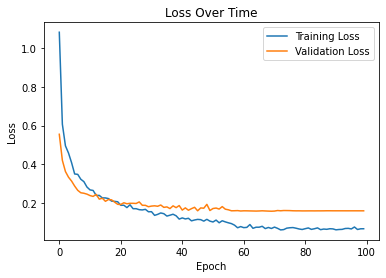

In [9]:
plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Time")

plt.show()

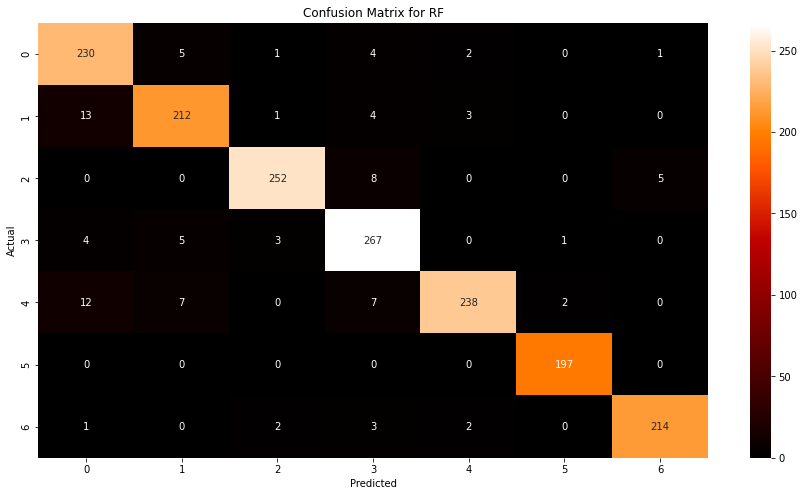

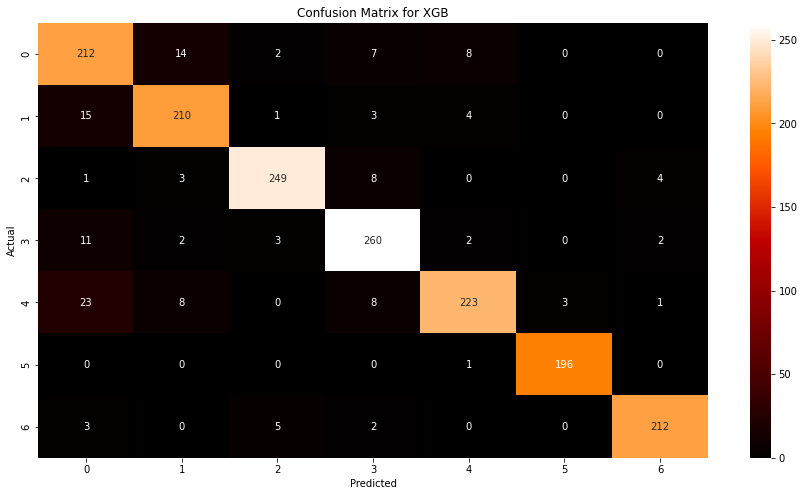

In [10]:
y_true = np.array(y_test)
y_pred = np.array(model_RF.predict(x_test))
y_pred_xgb = np.array(model_XGB.predict(x_test))

cm = confusion_matrix(y_true, y_pred)
cm_xgb = confusion_matrix(y_true, y_pred_xgb)
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF")
plt.show()
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGB")
plt.show()